
Final Project Part 1 - Proposal

Stephanie Pong

For my final project, I will be using a dataset of Amazon Ranking Analysis during summer 2016.

Hypothesis, Assumptions, and Goals

I want to use this data to figure out which variables may affect Amazon ranking. My assumption is that pricing, vendor and using of "buy box" service will all affect the ranking (There is discrepency between the Scraped Index True Rank and the Corrected Index Rank). Similarly, I want to figure out which types of vendor have the best advantage in ranking.

The higher ranking, the higher chance of sales. This information could help sellers decide in what services and on which platforms they should invest their time and money. I want to use this existing data to create a model that will predict the ranking on Amazon.

Risks and Limitations

The main limitation of using this dataset is that it only looked at 250 frequecntly pruchased product over the summer of 2016. We have different sellers with different products to join Amazon, which may show different trends. However, I believe that the data will be sufficient to create a working model that can predict current trends by analysing the relationship between the ranking, pricing and vendors.

The Dataset

As shown below, this dataset includes Ranking (ScrapedIndex, ScrapedIndexTrueRank and CorrectedIndexTrueRank), Price (ScrapedIndexPrice, CorrectedPrice and BBCorrectedPrice) and Vendor (Amazon, FBA and Others).

What are the feature?

Vendor Type
- Amazon
- FBA
- Other

What's the the Outcome/Response?
- Relation between the ranking and pricing

In [97]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

dataframe = pd.read_csv('09-19-Amazon-Ranking-Analysis.csv')
#Added a column Ranking Discrenpancy to see how much the items had been ranked higher than it should be. 
dataframe.loc[:,"RankDiscrepancy"] = dataframe["CorrectedIndexTrueRank"] - dataframe["ScrapedIndexTrueRank"]

#Price Discrenpancy (+positive value / Actual Total Price)
dataframe.loc[:,"PriceDiscrepancy"] = dataframe["CorrectedPrice"] - dataframe["ScrapedIndexPrice"]
#"Buy-Box" price difference (+positive value / Actual Total Price)
dataframe.loc[:, "BBPriceDiscrepancy"] = dataframe["BBCorrectedPrice"] - dataframe["BBScrapedPrice"]

dataframe.head()

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice,RankDiscrepancy,PriceDiscrepancy,BBPriceDiscrepancy
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02,-1,0.00,26.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02,1,5.03,26.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,0,0.00,5.07
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,0,0.00,5.07
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,0,0.00,5.07


In [98]:
dataframe.shape

(6973, 17)

In [99]:
#We are looking at 250 product over the summer of 2016
dataframe["ProductName"].nunique()

250

In [100]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 17 columns):
Index                     6973 non-null int64
ProductName               6973 non-null object
ScrapeDate                6973 non-null object
ScrapedIndex              6973 non-null int64
ScrapedIndexTrueRank      6973 non-null int64
CorrectedIndexTrueRank    6973 non-null int64
ScrapedIndexPrice         6973 non-null float64
CorrectedPrice            6973 non-null float64
ScrapedIndexVendor        6973 non-null object
ScrapedIndexVendorType    6973 non-null object
BBScrapedPrice            6973 non-null float64
BBVendorType              6973 non-null object
BBVendor                  6809 non-null object
BBCorrectedPrice          6973 non-null float64
RankDiscrepancy           6973 non-null int64
PriceDiscrepancy          6973 non-null float64
BBPriceDiscrepancy        6973 non-null float64
dtypes: float64(6), int64(5), object(6)
memory usage: 926.2+ KB


In [101]:
dataframe.describe()

,Index,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,BBScrapedPrice,BBCorrectedPrice,RankDiscrepancy,PriceDiscrepancy,BBPriceDiscrepancy
count,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000
mean,3486.000000,25.041876,22.730962,21.559300,54.904896,55.567631,36.295817,45.827961,-1.171662,0.662735,9.532144
std,2013.076046,23.618871,20.520442,19.154709,74.293356,74.476092,61.838063,63.889925,9.093269,2.335428,15.464100
min,0.000000,1.000000,1.000000,1.000000,2.380000,2.380000,-1.000000,0.000000,-106.000000,0.000000,-66.030000
25%,1743.000000,8.000000,7.000000,7.000000,19.530000,20.010000,8.990000,15.790000,-1.000000,0.000000,6.010000
50%,3486.000000,17.000000,16.000000,16.000000,31.900000,32.080000,14.940000,23.340000,0.000000,0.000000,6.840000
75%,5229.000000,35.000000,33.000000,31.000000,55.890000,56.100000,36.990000,47.920000,1.000000,0.000000,9.450000
max,6972.000000,162.000000,113.000000,107.000000,931.800000,931.800000,698.000000,706.110000,34.000000,33.120000,185.990000


In [102]:
#Should I narrow it down and focus on top ten items?
topten = dataframe.loc[:,"ProductName"].value_counts().head(10)

In [103]:
#sns.pairplot(dataframe[dataframe.loc[:,'ProductName'] == "Fujifilm INSTAX Mini Instant Film (Rainbow)"])

In [104]:
dataframe.sort_values(by = ["BBVendorType"])
dataframe.loc[dataframe.loc[:,"BBVendor"].isnull(),:].head()

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice,RankDiscrepancy,PriceDiscrepancy,BBPriceDiscrepancy
19,19,2wayz FULL METAL BODY Garden Hose Splitter | Y...,2016-06-20,1,1,1,40.00,40.00,Irtenzia,Other,-1.0,O,NaN,9.97,0,0.0,10.97
20,20,2wayz FULL METAL BODY Garden Hose Splitter | Y...,2016-06-20,2,2,2,54.94,54.94,Mild Shop,Other,-1.0,O,NaN,9.97,0,0.0,10.97
1367,1367,Bushnell Powerview 7-15X25 Compact Zoom Binocular,2016-08-30,1,1,1,53.04,53.04,PORTABLE GUY,Other,-1.0,O,NaN,165.50,0,0.0,166.50
1368,1368,Bushnell Powerview 7-15X25 Compact Zoom Binocular,2016-08-30,2,2,2,54.41,54.41,TheXBOXking,Other,-1.0,O,NaN,165.50,0,0.0,166.50
1369,1369,Bushnell Powerview 7-15X25 Compact Zoom Binocular,2016-08-30,3,3,3,54.69,54.69,WebyShops,Other,-1.0,O,NaN,165.50,0,0.0,166.50


In [105]:
#Fill the NaN value with NA
dataframe.loc[:,"BBVendor"].fillna(value='NA', inplace = True)


In [107]:
#sns.pairplot(dataframe)

C:\Users\Liszt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


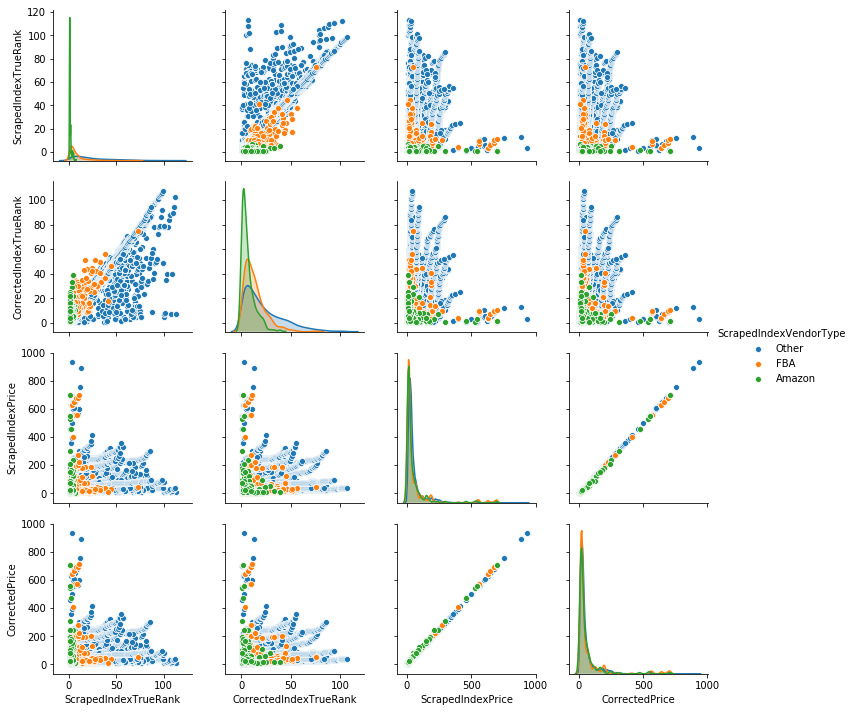

In [145]:

vars = ["ScrapedIndexTrueRank","CorrectedIndexTrueRank","ScrapedIndexPrice","CorrectedPrice"]
#x_vars=["ScrapedIndexPrice","CorrectedPrice"]
#y_vars=["ScrapedIndexTrueRank","CorrectedIndexTrueRank"]

#items with higher/lower ranking then it should be
dataframe_higher = dataframe[dataframe.loc[:,"RankDiscrepancy"] > 0]
dataframe_lower = dataframe[dataframe.loc[:,"RankDiscrepancy"] < 0]

a = sns.pairplot(dataframe, vars=vars, hue="ScrapedIndexVendorType")
#b = sns.pairplot(dataframe_higher, x_vars=x_vars, y_vars=y_vars, hue="ScrapedIndexVendorType")
#c = sns.pairplot(dataframe_lower, x_vars=x_vars, y_vars=y_vars, hue="ScrapedIndexVendorType")
#sns.pairplot(dataframe, x_vars=["ScrapedIndexTrueRank","CorrectedIndexTrueRank","PriceDiscrepancy","BBPriceDiscrepancy"], y_vars=["RankDiscrepancy"], hue="ScrapedIndexVendorType")

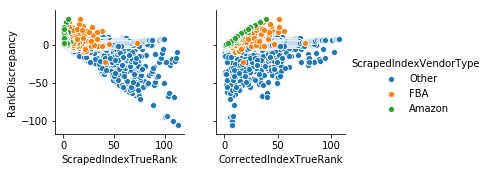

In [130]:
"""
Rank Discrenpancy = Corrected Rank (Rank by actual total cost: 5th) - Scraped Rank (On Amazon: 1st) = 4
Positive value reflects how much higher that the item has been ranked than it should has been.
-Most of the amazon vendor items had been ranked higher (within the range from 34th higher to 1th lower) than the ranking shown on the internet
-Majority of the FBA vendor items had been ranked higher (within the range from 34th higher to 23th lower) than the ranking shown on the internet
Negative value reflects how much lower that the item has been ranked than it should has been.
-Majority of the Other vendor items had been ranked lower (within the range from 13th higher to 106th lower) than the ranking shown on the internet.
"""

sns.pairplot(dataframe, x_vars=["ScrapedIndexTrueRank","CorrectedIndexTrueRank"], y_vars=["RankDiscrepancy"], hue="ScrapedIndexVendorType")


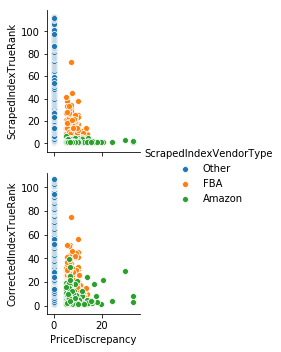

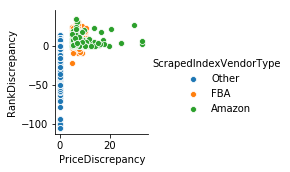

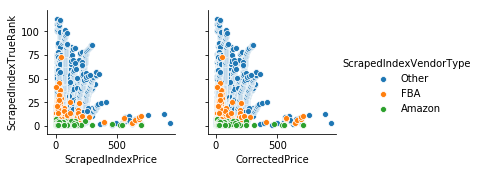

In [150]:
"""
Price Discrepancy = Corrected Price (insluded shipping fee) - Scraped Price

There's no price different between for those Other vendor items (Blue) which means they are reflecting 
the total actual cost (included shipping fee) on the website. 

Both Amazon vendor and FBA items are hidden the shipping cost form the website in order to get a higher ranking.

Comparing the ditrubution of Amazon vendor items (Green) on the first and second chat (Scraped Rank 
and Corrected Rank), we can see that almost all of their Scraped Rank is higher then the corrected Rank.


Seems like the rand don't have any relationship with the price, but the vendor type
"""

sns.pairplot(dataframe, x_vars=["PriceDiscrepancy"], y_vars=["ScrapedIndexTrueRank", "CorrectedIndexTrueRank"], hue="ScrapedIndexVendorType")
sns.pairplot(dataframe, x_vars=["PriceDiscrepancy"], y_vars=["RankDiscrepancy"], hue="ScrapedIndexVendorType")
sns.pairplot(dataframe, y_vars=["ScrapedIndexTrueRank"], x_vars=["ScrapedIndexPrice","CorrectedPrice"], hue="ScrapedIndexVendorType")


In [131]:

#Vendor = Amazon
dataframe_amazon = dataframe[dataframe.loc[:,"ScrapedIndexVendorType"] == "Amazon"]
dataframe_amazon.loc[:,["RankDiscrepancy","PriceDiscrepancy"]].describe()

,RankDiscrepancy,PriceDiscrepancy
count,192.000000,192.000000
mean,5.255208,8.424375
std,6.450169,4.288543
min,-1.000000,5.010000
25%,1.000000,6.352500
50%,3.000000,6.930000
75%,7.000000,9.060000
max,34.000000,33.120000


In [134]:
#Vendor = FBA
dataframe_fba = dataframe[dataframe.loc[:,"ScrapedIndexVendorType"] == "FBA"]
dataframe_fba.loc[:,["RankDiscrepancy","PriceDiscrepancy"]].describe()

,RankDiscrepancy,PriceDiscrepancy
count,409.000000,409.000000
mean,6.066015,7.344181
std,7.194636,2.152425
min,-23.000000,5.010000
25%,1.000000,6.070000
50%,4.000000,6.670000
75%,10.000000,8.000000
max,34.000000,24.440000


In [135]:
#Vendor = Other
dataframe_other = dataframe[dataframe.loc[:,"ScrapedIndexVendorType"] == "Other"]
dataframe_other.loc[:,["RankDiscrepancy","PriceDiscrepancy"]].describe()

,RankDiscrepancy,PriceDiscrepancy
count,6372.000000,6372.0
mean,-1.829881,0.0
std,8.993585,0.0
min,-106.000000,0.0
25%,-1.000000,0.0
50%,0.000000,0.0
75%,0.000000,0.0
max,13.000000,0.0


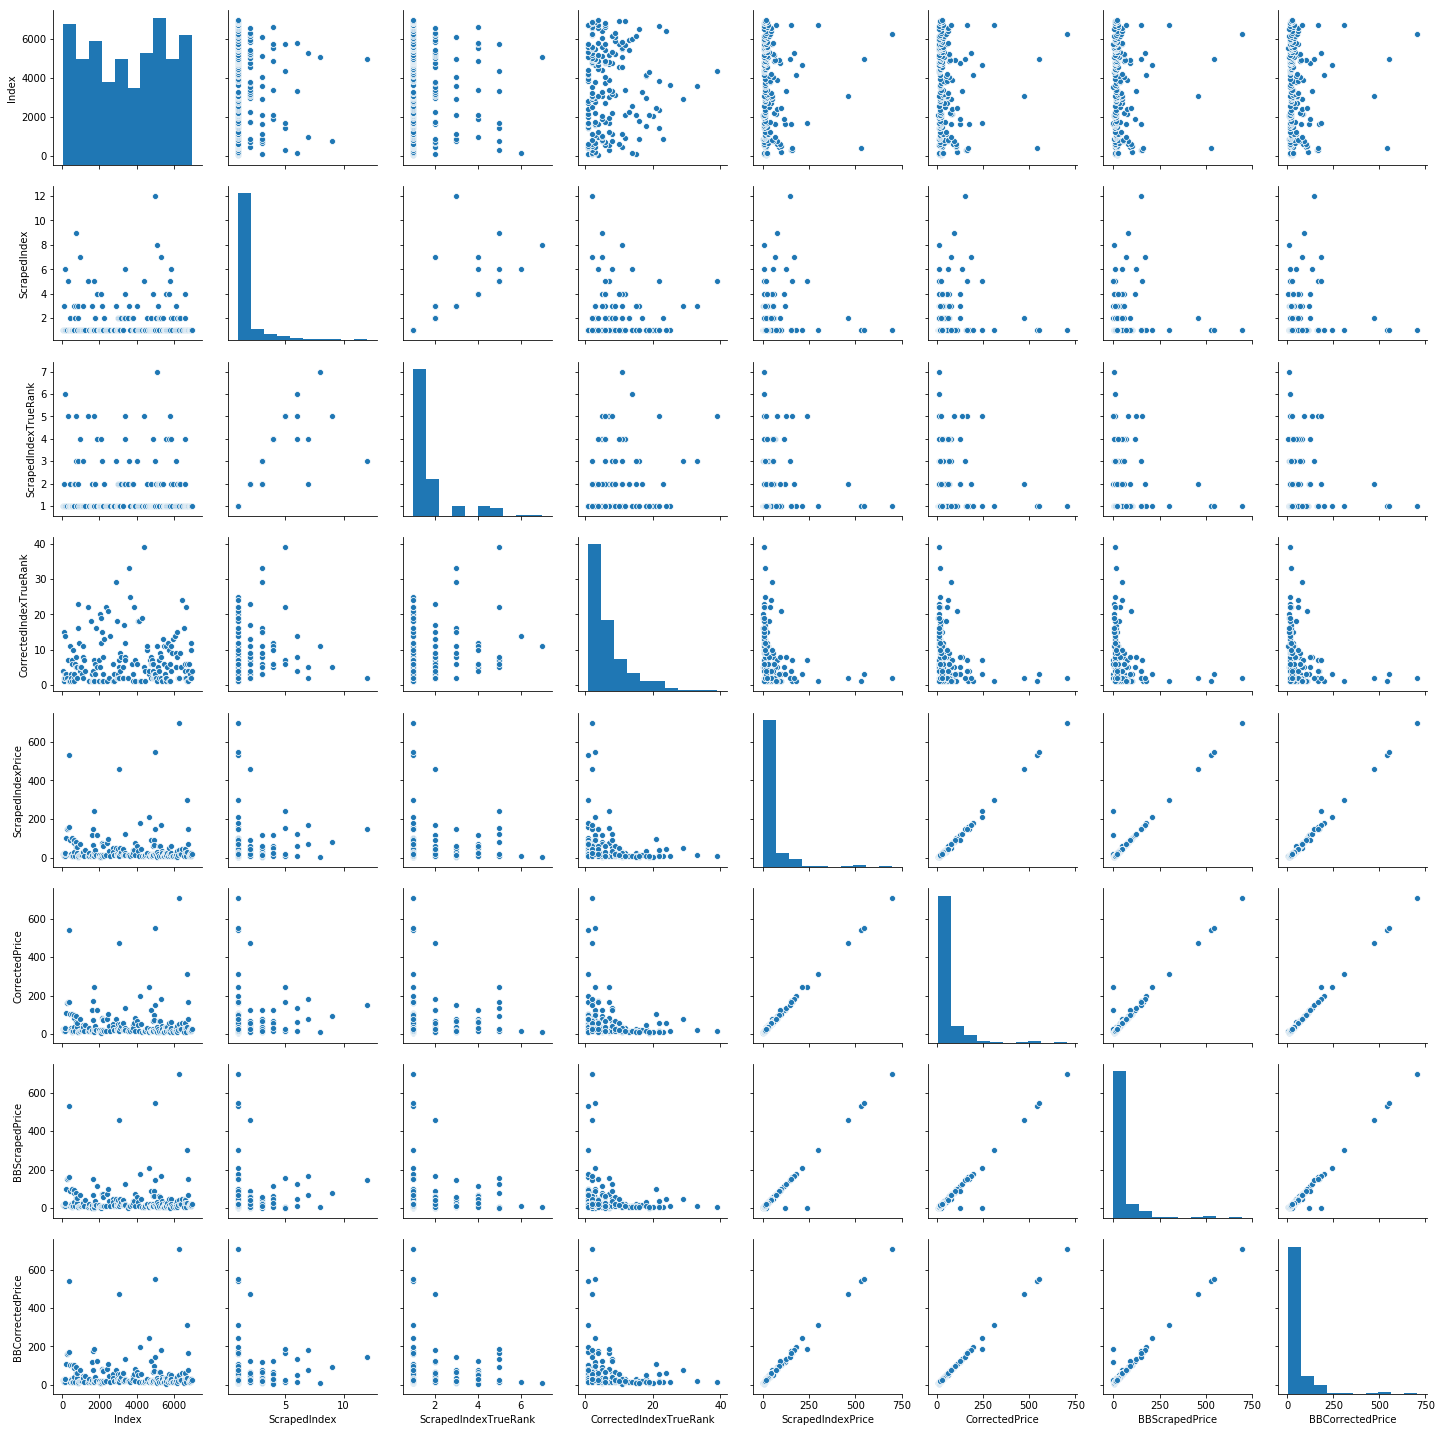

In [27]:
#dataframe.sort_values(by = "CorrectedIndexTrueRank")
dataframe_amazon = dataframe[dataframe.loc[:,"ScrapedIndexVendorType"] == "Amazon"]
sns.pairplot(dataframe_amazon)
#sns.pairplot(dataframe_amazon,vars=vars)

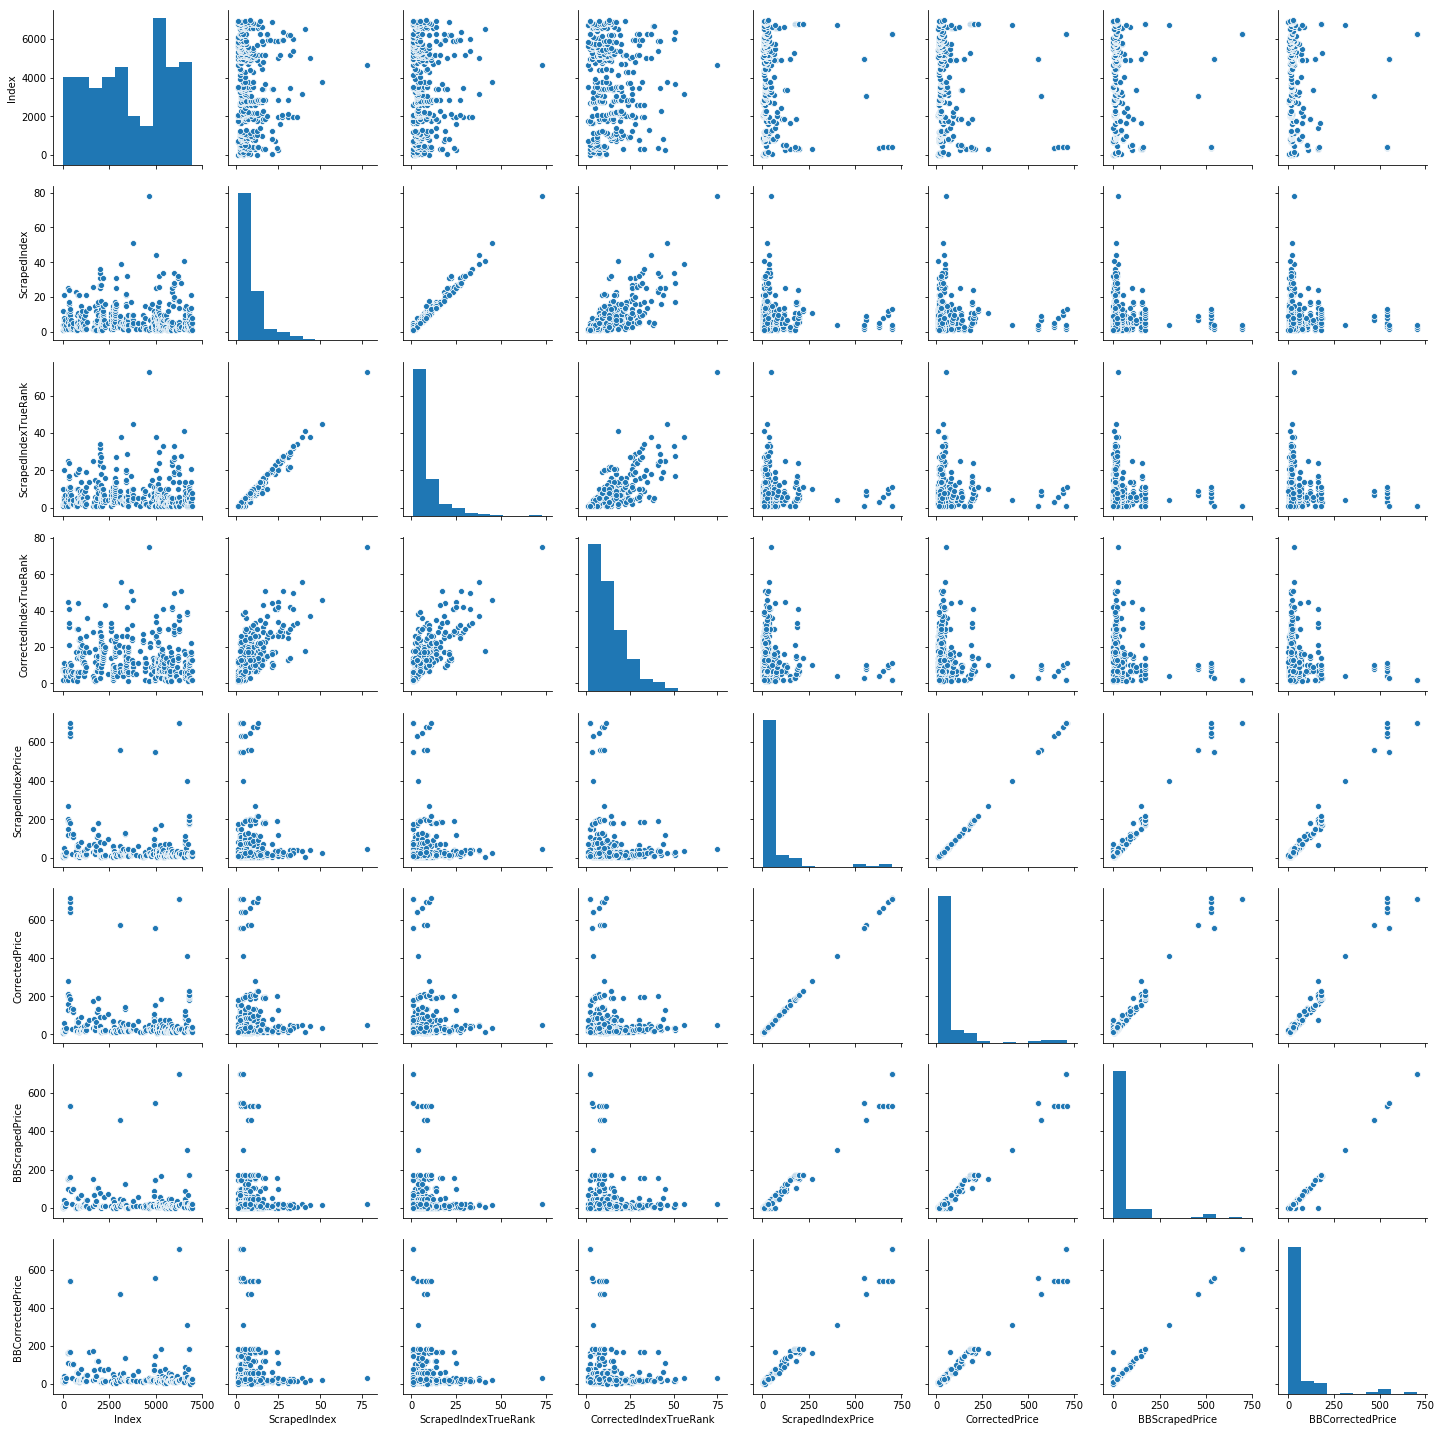

In [21]:
dataframe_fba = dataframe[dataframe.loc[:,"ScrapedIndexVendorType"] == "FBA"]
sns.pairplot(dataframe_fba)

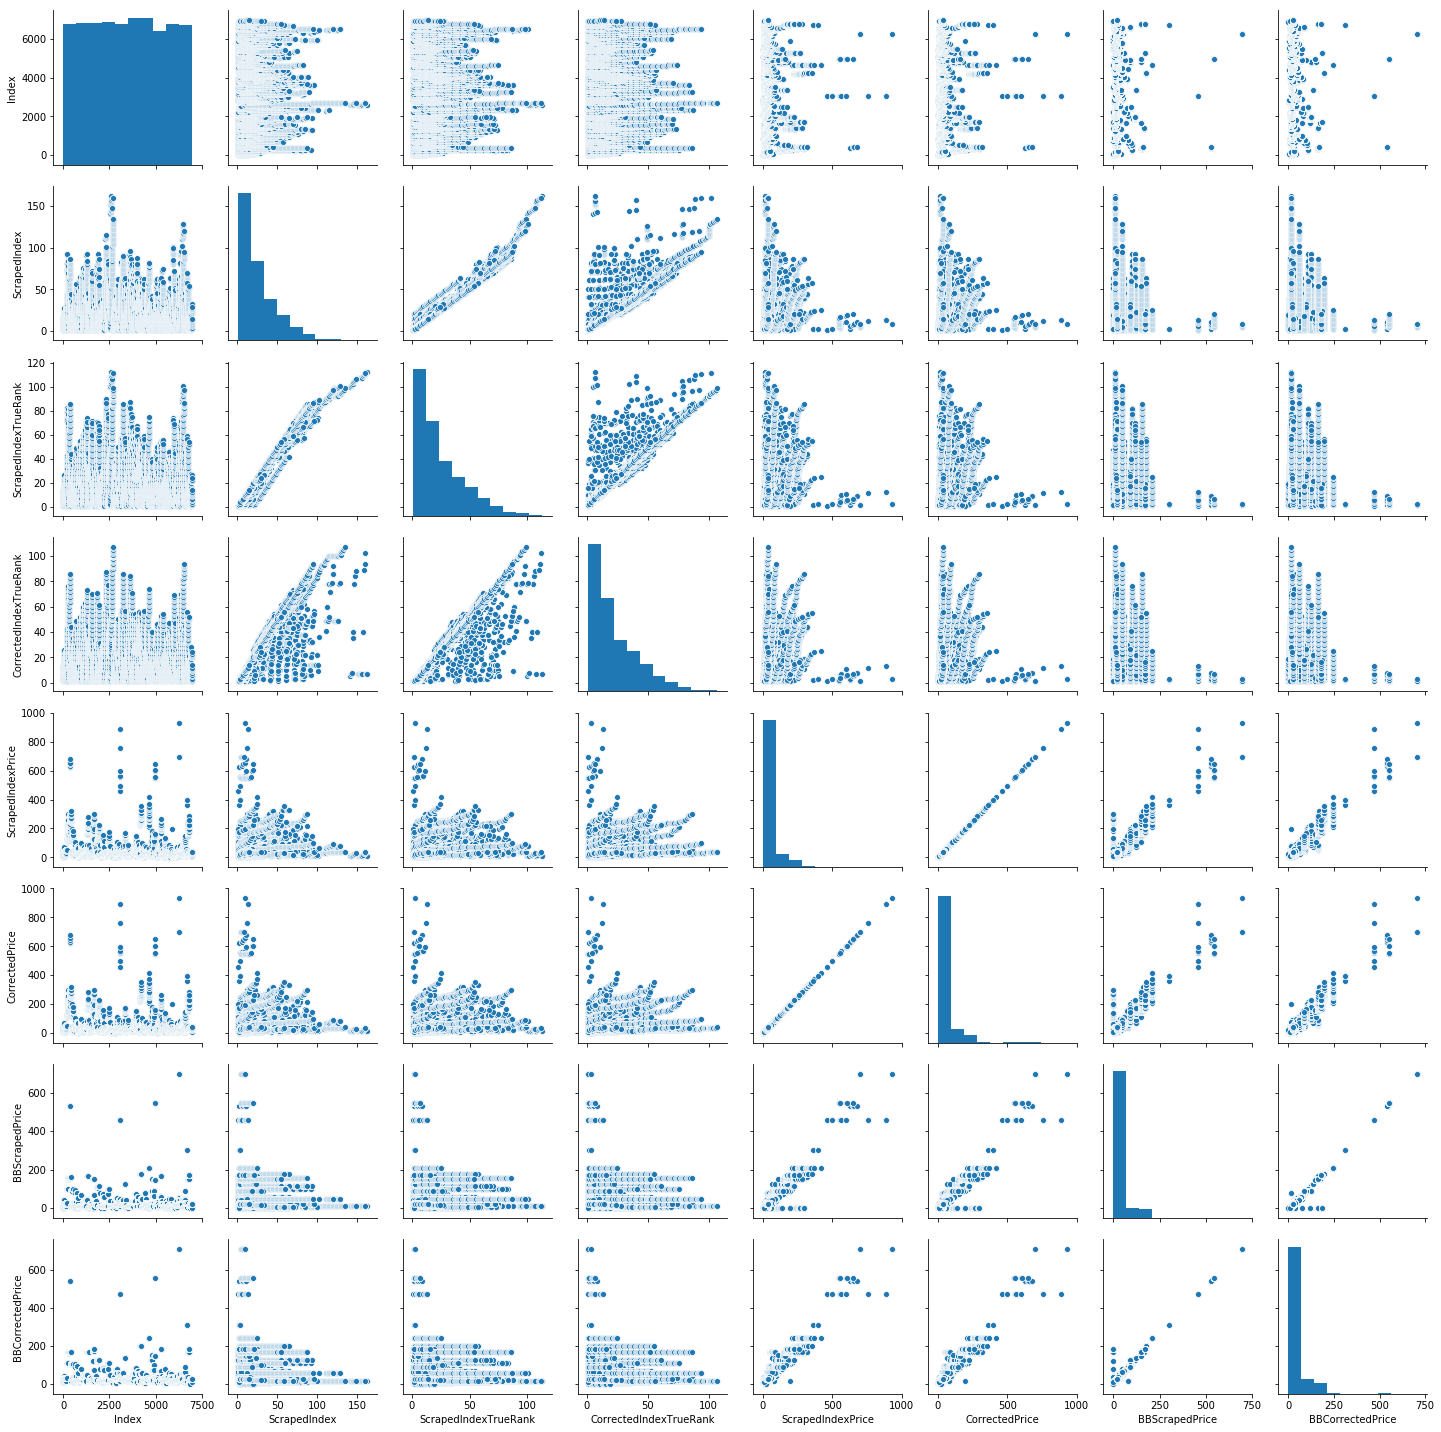

In [22]:
dataframe_other = dataframe[dataframe.loc[:,"ScrapedIndexVendorType"] == "Other"]
sns.pairplot(dataframe_other)

In [38]:
#dataframe_bbamazon = dataframe[dataframe.loc[:,"BBVendorType"] == "Amazon"]
#sns.pairplot(dataframe_bbamazon)

In [39]:
#dataframe_bbfba = dataframe[dataframe.loc[:,"BBVendorType"] == "FBA"]
#sns.pairplot(dataframe_bbfba)

In [40]:
#dataframe_bbother = dataframe[dataframe.loc[:,"BBVendorType"] == "O"]
#sns.pairplot(dataframe_bbother)